# Plot Individual ROH
Make nice plots of whole genome, in Karyotype style.

Plot every chromosome: Centromer, and then list of ROH Blocks

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patheffects as pe
import h5py   # For Processing HDF5s

In [112]:
def load_roh(iid, ch, path_folder = "../../Empirical/AncSards/"):
    """Load the ROH Dataframe for Individual iid and 
    Chromosome ch"""
    path = path_folder +  iid + "_1000G_ROH/chr" + str(ch) + "/roh.csv"
    roh_df = pd.read_csv(path)    
    return roh_df

def post_process_roh_df(df, min_cm=4, snp_cm=100, output=False):
    """Post Process ROH Dataframe.
    min_cm: Minimum Length in CentiMorgan
    snp_cm: How many SNPs per CentiMorgan"""
    densities = df["length"] / (df["lengthM"] * 100)
    densities_ok = (densities > snp_cm)
    
    df["SNP_Dens"] = densities
    
    # Filter for SNP Density:
    df = df[densities_ok]
    
    # Filter for Length:
    length_okay = (df["lengthM"] * 100) > min_cm
    
    if output==True:
        print(f"Min SNPs per cM> {snp_cm}: {np.sum(densities_ok)}/{len(densities_ok)}")
        print(f"> {min_cm} cM: {np.sum(length_okay)}/{len(length_okay)}")
    
    df = df[length_okay]
    return df

def load_h5(path, output=True):
        """Load and return the HDF5 File from Path"""
        f = h5py.File(path, "r")  # Load for Sanity Check. See below!
        if output == True:
            print("\nLoaded %i variants" % np.shape(f["calldata/GT"])[0])
            print("Loaded %i individuals" % np.shape(f["calldata/GT"])[1])
            # print(list(f["calldata"].keys()))
            # print(list(f["variants"].keys()))
            print(f"HDF5 loaded from {path}")
        return f
    
def chrom_length(ch, output=False):
    """Get and retrun length of Chromosome"""
    
    path1000G = "../../Data/1000Genomes/HDF5/1240kHDF5/Eur1240chr" + str(ch) + ".hdf5"  # Path of 1000G (without chromosome part)
    f = load_h5(path1000G, output=output)
    rec = np.array(f["variants/MAP"])
    l = np.max(rec)
    return rec, l

In [88]:
load_rohs(iid="MA89", ch=3)

,Start,End,StartM,EndM,length,lengthM,iid,ch
0,1268,1402,0.068913,0.081360,134,0.012447,MA89,3
1,2260,2391,0.121752,0.133587,131,0.011835,MA89,3
2,4930,5291,0.263912,0.279811,361,0.015899,MA89,3
3,7152,7618,0.349062,0.362140,466,0.013078,MA89,3
4,8763,9035,0.407479,0.419416,272,0.011937,MA89,3
5,25469,25799,0.949664,0.966756,330,0.017092,MA89,3
6,28180,41981,1.067167,1.469540,13801,0.402373,MA89,3
7,45932,46114,1.618502,1.630980,182,0.012478,MA89,3
8,49507,49987,1.714682,1.727050,480,0.012368,MA89,3
9,51983,52212,1.824099,1.836916,229,0.012817,MA89,3


# Area 51

In [28]:
ch_l = [2.5, 2]
cents = [1,1.1]

Saved to ../../figures_test/MA89_allchrroh.pdf


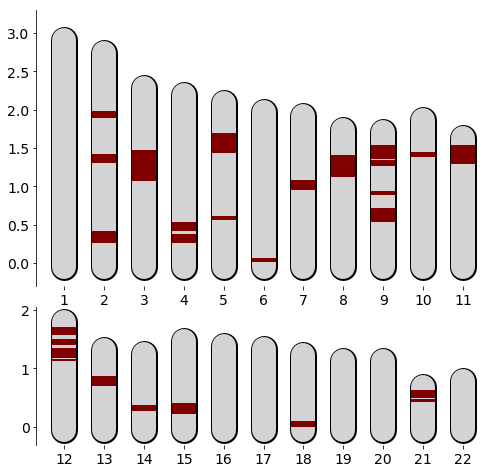

In [123]:
def plot_chromosome(ax, l, x_pos, lw=24, df_roh = []):
    """Plot a Chromosome of length l with centromer ctr on ax 
    at x_pos"""
    ln, = ax.plot([x_pos, x_pos], [-0.05,l+0.05], lw = lw, color="lightgray", 
                      solid_capstyle = 'round', zorder=0,
                  path_effects=[pe.Stroke(linewidth=lw+3, foreground='k'), pe.Normal()])
    
    ### Plot the ROH List if given
    if len(df_roh) > 0:
        starts, ends = df_roh["StartM"].values, df_roh["EndM"].values
        
        for i in range(len(df_roh)):
            ax.plot([x_pos, x_pos], [starts[i], ends[i]], lw=lw, color="maroon", 
                    zorder=1, alpha=1.0, solid_capstyle="butt")
            
            #ax.plot([x_pos, x_pos], [-0.01, 0], lw=lw-1, color="black", 
            #        zorder=1, alpha=0.6, solid_capstyle="butt")


### Actual Figure
iid = "MA89"
fs = 14
plt.figure(figsize=(8,8))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
gs.update(hspace=0.1) # set the spacing between axes. 

ax = plt.subplot(gs[0]) # The left subplot
ax1 = plt.subplot(gs[1]) # The middle one

### Plot the First 11 Chromosomes
for i in range(1,12):
        rec, l = chrom_length(i)
        df_roh = load_roh(iid="MA89", ch=i)
        df_roh = post_process_roh_df(df_roh) # Standad PP
        
        plot_chromosome(ax, l, x_pos=(i), df_roh=df_roh)
        
        
for i in range(12,23):
        rec, l = chrom_length(i)
        df_roh = load_roh(iid=iid, ch=i)
        df_roh = post_process_roh_df(df_roh) # Standad PP
        
        plot_chromosome(ax1, l, x_pos=(i - 11), df_roh=df_roh)

# Set the Plot Limits
ax.set_xlim([0.3, 11.5])
ax1.set_xlim([0.3, 11.5])

ax.set_ylim([-0.3,3.3])
ax1.set_ylim([-0.3, 2.05])

# Turn off the Y Axis
for ax0 in [ax, ax1]:
    ax0.spines['right'].set_visible(False)
    ax0.spines['top'].set_visible(False)
    ax0.spines['bottom'].set_visible(False)
    ax0.yaxis.set_tick_params(labelsize=fs)

rang = np.arange(1,12)
ax.set_xticks(rang)
ax.set_xticklabels(rang, fontsize=fs)

ax1.set_xticks(rang)
ax1.set_xticklabels(rang+11, fontsize=fs)
ax1.set_xticklabels(rang+11, fontsize=fs)

#xticks(x, labels, rotation='vertical')
#ax.xtick
### Plot the second 11 Chromosomes

savepath="../../figures_test/" + iid + "_allchrroh.pdf"
plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0)
print(f"Saved to {savepath}")


#ax1.plot([1,2],[2,4], "ro")
plt.show()